In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("CarRentalData.csv")
df

,fuelType,rating,renterTripsTaken,reviewCount,location.city,location.country,location.latitude,location.longitude,location.state,owner.id,rate.daily,vehicle.make,vehicle.model,vehicle.type,vehicle.year
0,ELECTRIC,5.00,13,12,Seattle,US,47.449107,-122.308841,WA,12847615,135,Tesla,Model X,suv,2019
1,ELECTRIC,5.00,2,1,Tijeras,US,35.111060,-106.276551,NM,15621242,190,Tesla,Model X,suv,2018
2,HYBRID,4.92,28,24,Albuquerque,US,35.127163,-106.566681,NM,10199256,35,Toyota,Prius,car,2012
3,GASOLINE,5.00,21,20,Albuquerque,US,35.149726,-106.711425,NM,9365496,75,Ford,Mustang,car,2018
4,GASOLINE,5.00,3,1,Albuquerque,US,35.208659,-106.601008,NM,3553565,47,Chrysler,Sebring,car,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5846,GASOLINE,5.00,32,27,Honolulu,US,21.292950,-157.836856,HI,9794111,33,Chevrolet,Cruze,car,2017
5847,HYBRID,5.00,17,16,Aiea,US,21.375507,-157.914919,HI,2754690,49,Lexus,HS 250h,car,2010
5848,GASOLINE,4.94,18,17,Kailua,US,21.378719,-157.727816,HI,11313508,35,smart,fortwo,car,2013
5849,GASOLINE,NaN,1,0,Waipahu,US,21.376105,-158.020237,HI,4209883,77,GMC,Savana,van,2015


In [3]:
print(df.shape)
print(df.duplicated().sum())
table = pd.DataFrame({
    'Unique':df.nunique(),
    'Null':df.isna().sum(),
    'NullPercent':df.isna().sum() / len(df),
    'Type':df.dtypes.values
})
display(table)

(5851, 15)
0


,Unique,Null,NullPercent,Type
fuelType,4,75,0.012818,object
rating,80,501,0.085626,float64
renterTripsTaken,238,0,0.000000,int64
reviewCount,203,0,0.000000,int64
location.city,971,0,0.000000,object
location.country,1,0,0.000000,object
location.latitude,5839,0,0.000000,float64
location.longitude,5834,0,0.000000,float64
location.state,46,0,0.000000,object
owner.id,3093,0,0.000000,int64


In [4]:
df.drop_duplicates(inplace =True)


## Transforming data

In [5]:
car = df.select_dtypes(include='O')
car

,fuelType,location.city,location.country,location.state,vehicle.make,vehicle.model,vehicle.type
0,ELECTRIC,Seattle,US,WA,Tesla,Model X,suv
1,ELECTRIC,Tijeras,US,NM,Tesla,Model X,suv
2,HYBRID,Albuquerque,US,NM,Toyota,Prius,car
3,GASOLINE,Albuquerque,US,NM,Ford,Mustang,car
4,GASOLINE,Albuquerque,US,NM,Chrysler,Sebring,car
...,...,...,...,...,...,...,...
5846,GASOLINE,Honolulu,US,HI,Chevrolet,Cruze,car
5847,HYBRID,Aiea,US,HI,Lexus,HS 250h,car
5848,GASOLINE,Kailua,US,HI,smart,fortwo,car
5849,GASOLINE,Waipahu,US,HI,GMC,Savana,van


In [6]:
df['fuelType'] = df['fuelType'].fillna('Unknow')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5851 entries, 0 to 5850
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fuelType            5851 non-null   object 
 1   rating              5350 non-null   float64
 2   renterTripsTaken    5851 non-null   int64  
 3   reviewCount         5851 non-null   int64  
 4   location.city       5851 non-null   object 
 5   location.country    5851 non-null   object 
 6   location.latitude   5851 non-null   float64
 7   location.longitude  5851 non-null   float64
 8   location.state      5851 non-null   object 
 9   owner.id            5851 non-null   int64  
 10  rate.daily          5851 non-null   int64  
 11  vehicle.make        5851 non-null   object 
 12  vehicle.model       5851 non-null   object 
 13  vehicle.type        5851 non-null   object 
 14  vehicle.year        5851 non-null   int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 731.4+

In [7]:
df.drop('location.country',axis=1, inplace=True)
df.dropna(inplace=True)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5350 entries, 0 to 5850
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fuelType            5350 non-null   object 
 1   rating              5350 non-null   float64
 2   renterTripsTaken    5350 non-null   int64  
 3   reviewCount         5350 non-null   int64  
 4   location.city       5350 non-null   object 
 5   location.latitude   5350 non-null   float64
 6   location.longitude  5350 non-null   float64
 7   location.state      5350 non-null   object 
 8   owner.id            5350 non-null   int64  
 9   rate.daily          5350 non-null   int64  
 10  vehicle.make        5350 non-null   object 
 11  vehicle.model       5350 non-null   object 
 12  vehicle.type        5350 non-null   object 
 13  vehicle.year        5350 non-null   int64  
dtypes: float64(3), int64(5), object(6)
memory usage: 627.0+ KB


In [9]:
df.head()

,fuelType,rating,renterTripsTaken,reviewCount,location.city,location.latitude,location.longitude,location.state,owner.id,rate.daily,vehicle.make,vehicle.model,vehicle.type,vehicle.year
0,ELECTRIC,5.00,13,12,Seattle,47.449107,-122.308841,WA,12847615,135,Tesla,Model X,suv,2019
1,ELECTRIC,5.00,2,1,Tijeras,35.111060,-106.276551,NM,15621242,190,Tesla,Model X,suv,2018
2,HYBRID,4.92,28,24,Albuquerque,35.127163,-106.566681,NM,10199256,35,Toyota,Prius,car,2012
3,GASOLINE,5.00,21,20,Albuquerque,35.149726,-106.711425,NM,9365496,75,Ford,Mustang,car,2018
4,GASOLINE,5.00,3,1,Albuquerque,35.208659,-106.601008,NM,3553565,47,Chrysler,Sebring,car,2010


## "Data Visualization"

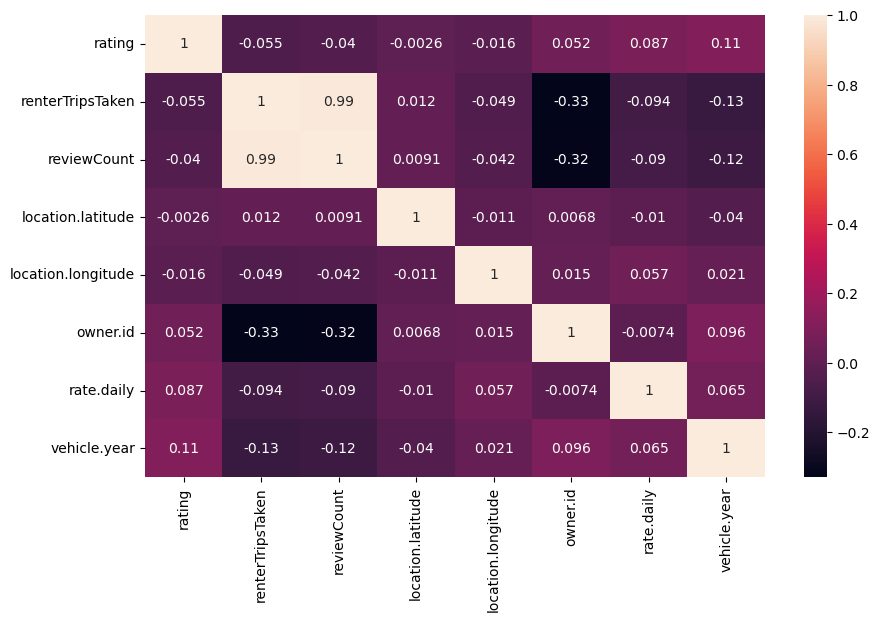

In [10]:
plt.figure(figsize = (10,6))
sns.heatmap(df.corr() , annot = True)
plt.show()

This correlation heatmap provides a visual and numerical depiction of the relationships between different variables in a car rental dataset. Observations from this graph include:

A strong positive correlation (0.99) between renterTripsTaken and reviewCount, which suggests that cars that are rented out more frequently tend to receive more reviews.

There is little to no correlation between location.latitude and location.longitude with other variables, implying that the geographical location of cars does not strongly influence other factors like rating, renterTripsTaken, or rate.daily.

rating has no significant positive or negative correlation with any other variables, indicating that customer ratings do not necessarily depend on the number of trips, reviews, or the daily rate of the car.

vehicle.year shows a very slight positive correlation (0.11) with rating, suggesting that newer cars might have slightly better ratings, but the correlation is too weak to draw a definitive conclusion.

There are no very strong correlations between rate.daily and other variables, with the highest being a negative correlation (-0.094) with renterTripsTaken, which could hint that higher-priced rentals are taken on fewer trips, but again, this correlation is relatively weak.

The heatmap effectively uses color intensity to represent the strength of the correlation, with darker shades (both dark purple and dark red) indicating stronger relationships, and lighter shades indicating weaker relationships.

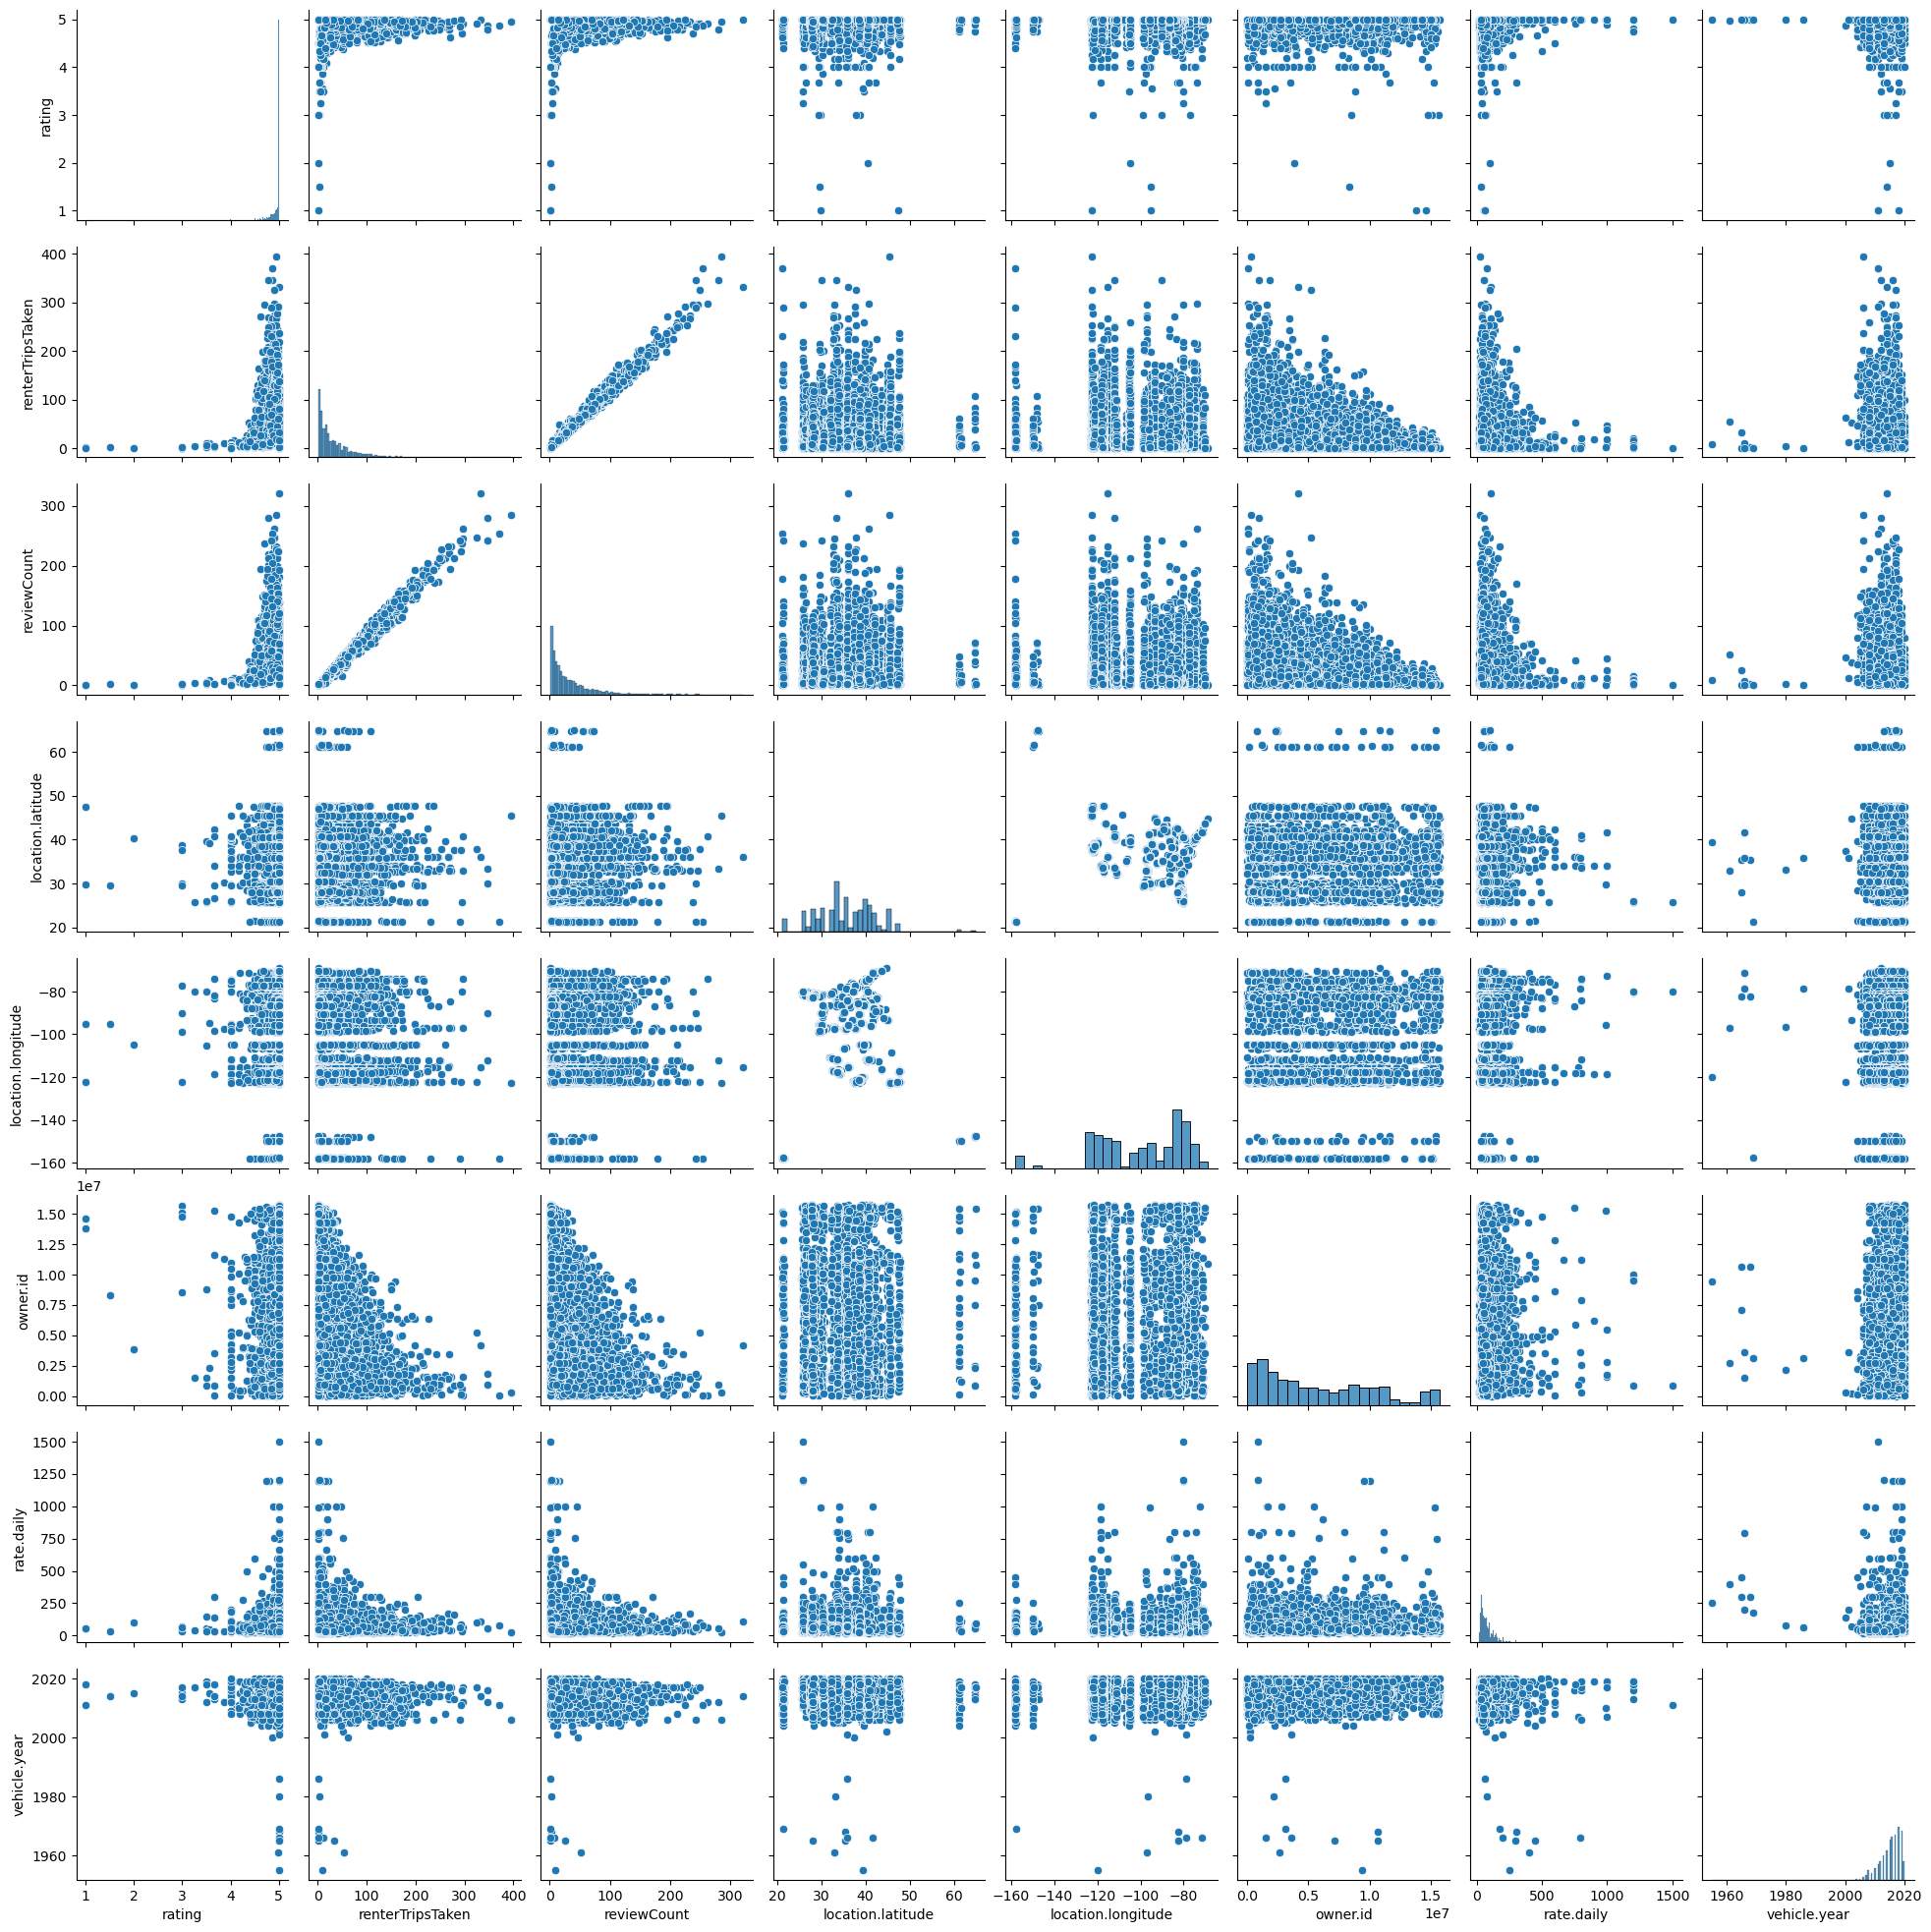

In [11]:
sns.pairplot(df)
plt.show()

This graph is a pair plot, also known as a scatterplot matrix. It provides multi-variable analysis of the dataset by showing the distribution of single variables and the relationships between two variables. Here’s a brief overview:

Diagonal Histograms: Each histogram on the diagonal shows the distribution of a single variable, indicating the frequency of its values. For example, there's a variable with a bimodal distribution (two peaks), suggesting two common values or ranges of values that it takes.

Scatter Plots: The off-diagonal plots are scatter plots that show the relationship between pairs of variables. Linear relationships appear as trends or clusters of points along a line. Non-linear or no relationships are indicated by more scattered, less structured point distributions.

Dense Clusters and Outliers: Some scatter plots show very dense clusters along with scattered points, indicating potential outlier values or distinct groupings within the data.

Variables with Discrete Values: Some plots show vertical or horizontal lines, which usually means that one of the variables being compared is discrete or categorical in nature.

Overall, this pair plot can reveal correlations, distributions, and potential outliers, which are all crucial for understanding a dataset before applying any statistical or machine learning models

## "Daily Rate"

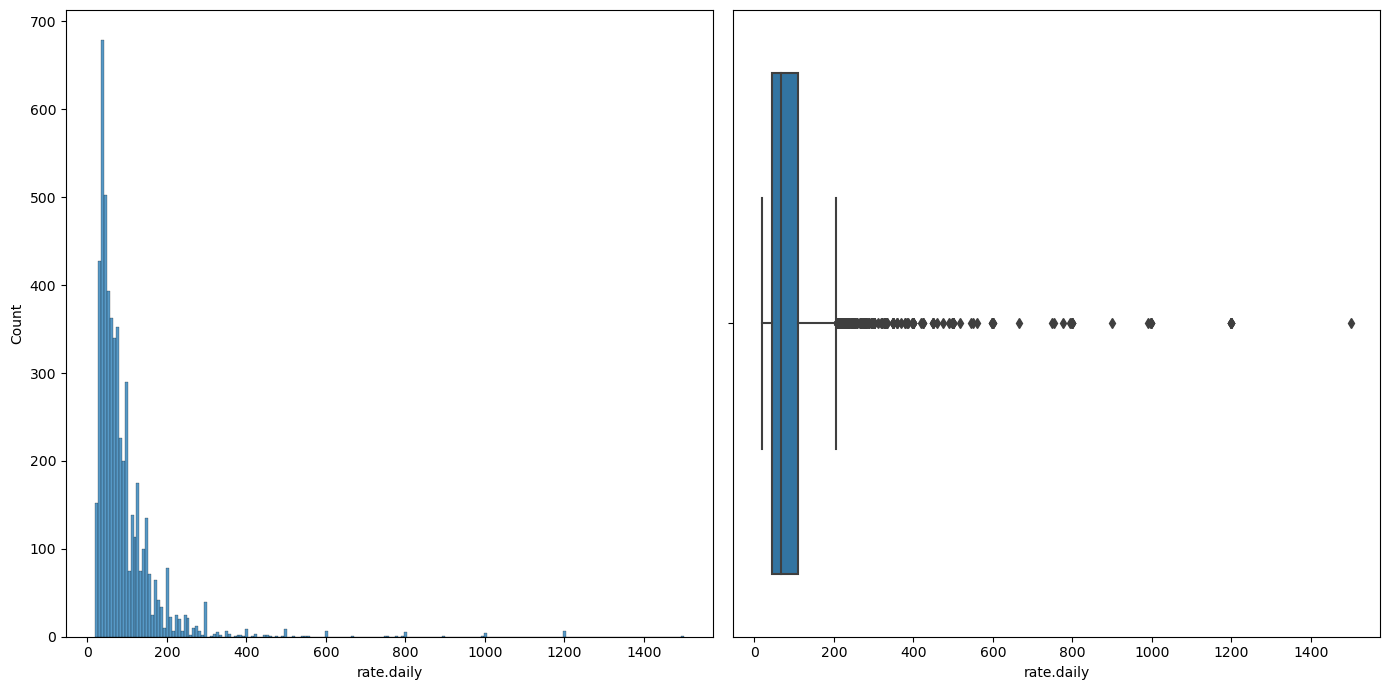

In [12]:
fig, axes = plt.subplots(1,2, figsize=(14,7))
sns.histplot(x=df['rate.daily'], ax=axes[0])
sns.boxplot(x=df['rate.daily'], ax=axes[1])

plt.tight_layout()
plt.show()

The histogram shows a right-skewed distribution, meaning most data points are low with a few high outliers. 

The boxplot indicates a median closer to the lower quartile, with several high-value outliers. Both suggest the majority of data are on the lower end of the scale.

In [13]:
print('Maximum Daily Rate:',df['rate.daily'].max())
print('Maximum Daily Rate:',df['rate.daily'].min())
print('Maximum Daily Rate:',df['rate.daily'].mean())
print('Maximum Daily Rate:',df['rate.daily'].median())
print('Variance of Daily Rate:',df['rate.daily'].std())

Maximum Daily Rate: 1500
Maximum Daily Rate: 20
Maximum Daily Rate: 90.98915887850467
Maximum Daily Rate: 68.0
Variance of Daily Rate: 90.02129468191207


In [14]:
rate_min = df[df['rate.daily'] == 20]
rate_min


,fuelType,rating,renterTripsTaken,reviewCount,location.city,location.latitude,location.longitude,location.state,owner.id,rate.daily,vehicle.make,vehicle.model,vehicle.type,vehicle.year
1590,GASOLINE,5.00,10,8,Fort Worth,32.866469,-97.426709,TX,256806,20,FIAT,500,car,2015
2836,GASOLINE,4.78,28,23,Minneapolis,44.912214,-93.211376,MN,1300675,20,Toyota,Yaris,car,2012
2862,GASOLINE,5.00,6,3,Minneapolis,44.912026,-93.209770,MN,1300675,20,Toyota,Yaris,car,2008
3056,GASOLINE,4.98,65,54,Edmond,35.651699,-97.555440,OK,7472911,20,Nissan,Altima,car,2009
3910,GASOLINE,5.00,2,2,Mesa,33.463605,-111.754630,AZ,1143331,20,Nissan,Versa,car,2016
4656,GASOLINE,5.00,12,11,Renton,47.452929,-122.197827,WA,404233,20,Chevrolet,Aveo,car,2010
4750,GASOLINE,5.00,13,13,Orlando,28.546660,-81.377734,FL,6598076,20,FIAT,500,car,2012
5093,GASOLINE,5.00,6,4,Salt Lake City,40.806653,-111.947767,UT,5558753,20,Chrysler,Sebring,car,2006
5111,GASOLINE,4.86,9,7,Salt Lake City,40.806919,-111.947760,UT,5558753,20,Ford,Taurus,car,2006
5224,GASOLINE,4.97,39,31,Irvine,33.671409,-117.836747,CA,1186913,20,Kia,Rio,car,2015


In [15]:
rate_max = df[df['rate.daily'] == 1500]
rate_max

,fuelType,rating,renterTripsTaken,reviewCount,location.city,location.latitude,location.longitude,location.state,owner.id,rate.daily,vehicle.make,vehicle.model,vehicle.type,vehicle.year
4235,GASOLINE,5.0,1,1,Miami,25.762867,-80.18934,FL,864946,1500,Rolls Royce,Ghost,car,2011


## "Trips Completed vs Review Counts"

<AxesSubplot:xlabel='reviewCount', ylabel='renterTripsTaken'>

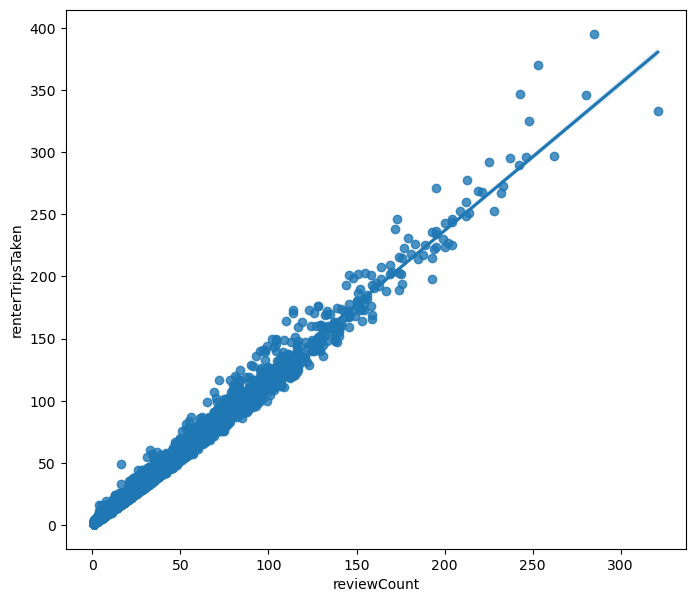

In [16]:
plt.figure(figsize=(8,7))
sns.regplot(x=df['reviewCount'], y=df['renterTripsTaken'])

The scatter plot shows a strong positive correlation between review count and renter trips taken, suggesting that as the number of reviews increases, the number of trips also increases.


## Reviews vs Rating

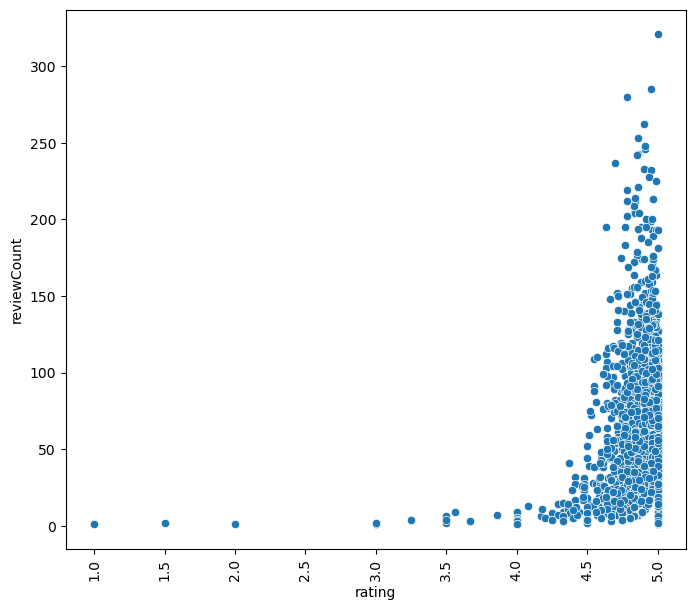

In [17]:
plt.figure(figsize=(8,7))
sns.scatterplot(y=df['reviewCount'], x=df['rating'])
plt.xticks(rotation=90)
plt.show()

The scatter plot shows that higher ratings typically have a higher count of reviews, with the majority of data points clustered at a rating of 5. This indicates a trend where the most frequently reviewed items are also highly rated.

## "Most Frequent Car ID"

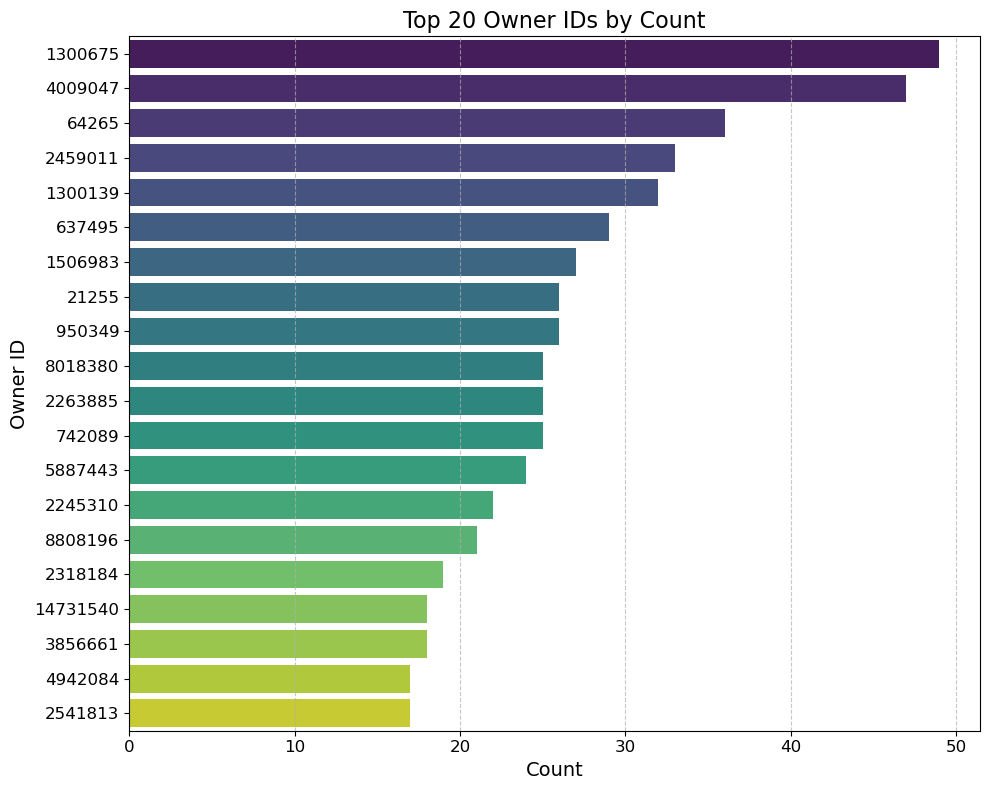

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))  # Set the figure size

# Create the count plot with seaborn
sns.countplot(y=df['owner.id'], 
              order=df['owner.id'].value_counts().index[:20],  # Display top 20 values
              palette='viridis')  # Use a different color palette for better visibility

plt.title('Top 20 Owner IDs by Count', fontsize=16)  # Add title
plt.xlabel('Count', fontsize=14)  # Add x-axis label
plt.ylabel('Owner ID', fontsize=14)  # Add y-axis label
plt.xticks(fontsize=12)  # Adjust x-axis tick font size
plt.yticks(fontsize=12)  # Adjust y-axis tick font size
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add horizontal gridlines

# Show plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


The bar chart displays the top 20 owner IDs by count, showing the frequency at which each owner's cars are rented.

The owners at the top have the highest counts, indicating their cars are rented more often. 

The color gradient may represent different categories or just be used for visual differentiation.

## "What is the most frequent vehicle type and fuel type?"

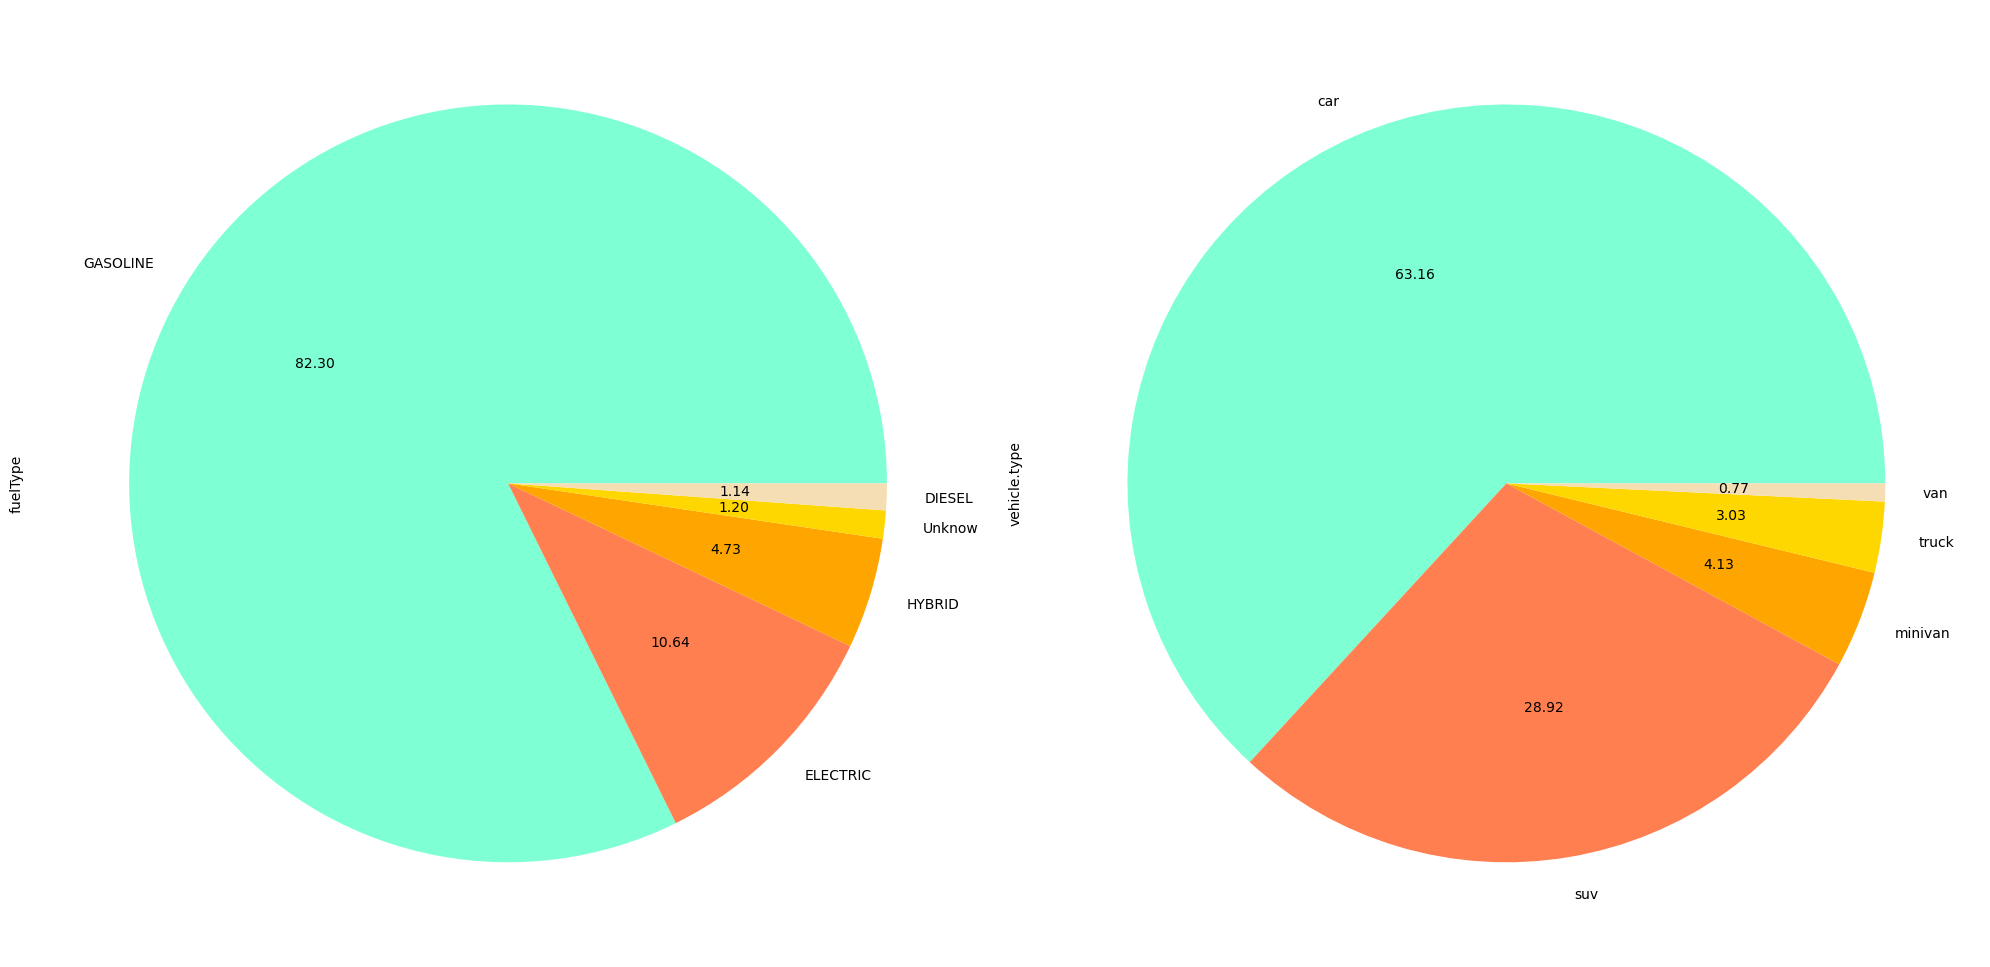

In [19]:
color = ['aquamarine','coral','orange','gold','wheat']
columns = ['fuelType','vehicle.type']
plt.figure(figsize=(20,24))
for i, col in enumerate(columns):
    axes = plt.subplot(2,2, i + 1)
    df[col].value_counts().plot.pie(autopct='%.2f',colors=color)   

plt.tight_layout()
plt.show()

The pie charts show the distribution of fuel types and vehicle types. For fuel types, most vehicles use gasoline, followed by hybrid, diesel, and a smaller percentage of electric. In terms of vehicle types, the majority are cars, followed by SUVs, with trucks and vans being less common.

## What year had the most rented cars?

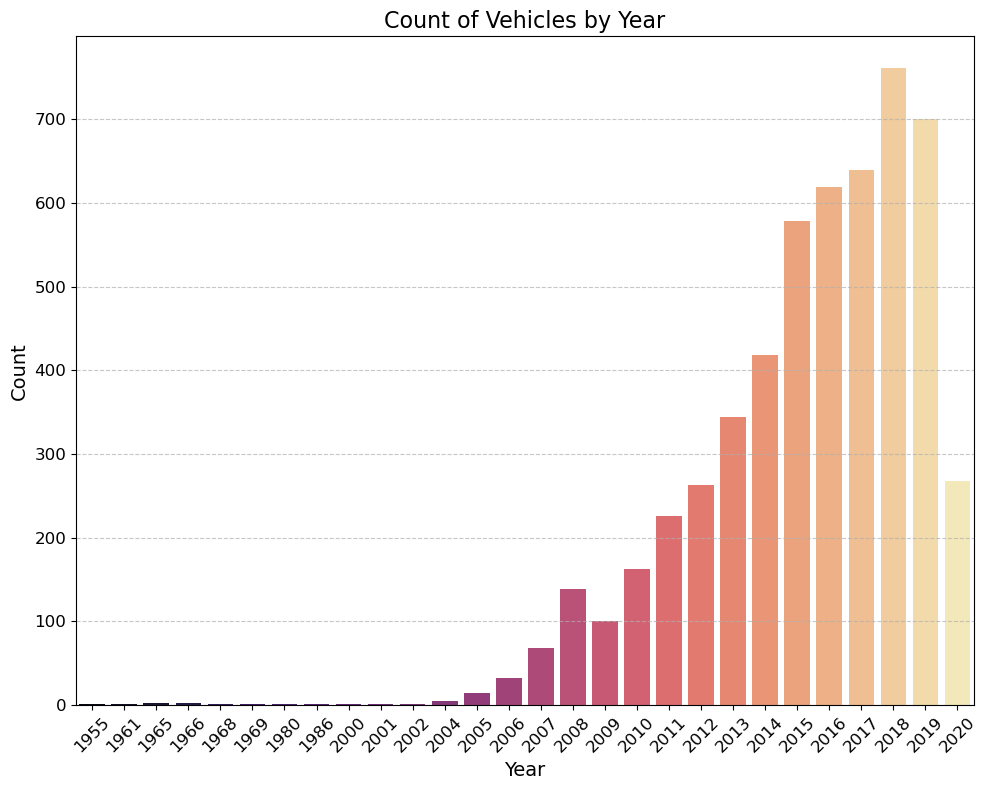

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))  # Set the figure size

# Create the count plot with seaborn
sns.countplot(x=df['vehicle.year'], palette='magma')  # Use a different color palette for better visibility

plt.title('Count of Vehicles by Year', fontsize=16)  # Add title
plt.xlabel('Year', fontsize=14)  # Add x-axis label
plt.ylabel('Count', fontsize=14)  # Add y-axis label
plt.xticks(rotation=45, fontsize=12)  # Rotate x-axis labels and adjust font size
plt.yticks(fontsize=12)  # Adjust y-axis tick font size
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal gridlines

# Show plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


The bar chart displays the number of vehicles available for each year, starting from around 1955 to 2020. There's a notable increase in the number of vehicles from the early 2000s, with the most significant rise starting from 2010 onwards. The peak is observed in the year 2019, where the highest number of vehicles are recorded in the dataset. The color gradient darkens with more recent years, possibly indicating newer vehicles are being added to the service more frequently. The data suggests that the rental service has been expanding its fleet over the years, especially with more recent models.

## What is the most rented car brand?

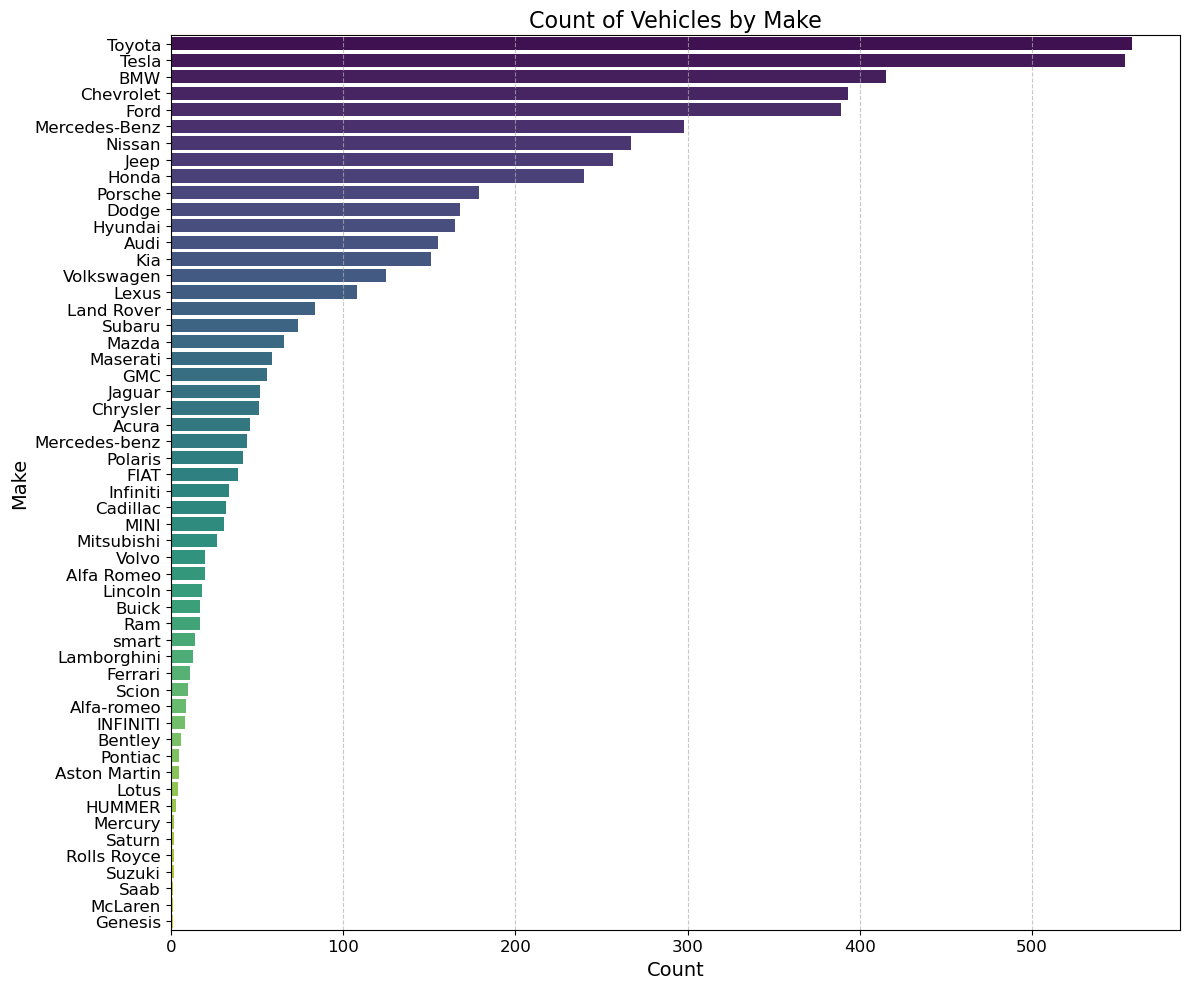

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))  # Set the figure size

# Create the count plot with seaborn
sns.countplot(y=df['vehicle.make'], 
              order=df['vehicle.make'].value_counts().index,  # Order by count of each make
              palette='viridis')  # Use a different color palette for better visibility

plt.title('Count of Vehicles by Make', fontsize=16)  # Add title
plt.xlabel('Count', fontsize=14)  # Add x-axis label
plt.ylabel('Make', fontsize=14)  # Add y-axis label
plt.xticks(fontsize=12)  # Adjust x-axis tick font size
plt.yticks(fontsize=12)  # Adjust y-axis tick font size
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add horizontal gridlines

# Show plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


The horizontal bar chart ranks car makes by the count of vehicles available in the dataset. Toyota, Chevrolet, and Ford are the most common, indicating they are popular choices in the rental fleet. There's a steep decline in counts as we move down the list, with luxury and exotic brands like Lamborghini and Ferrari having far fewer vehicles available. This distribution suggests a fleet composed predominantly of mass-market brands, with a smaller representation of premium and luxury brands.


## "Daily Rate by Car Brand"

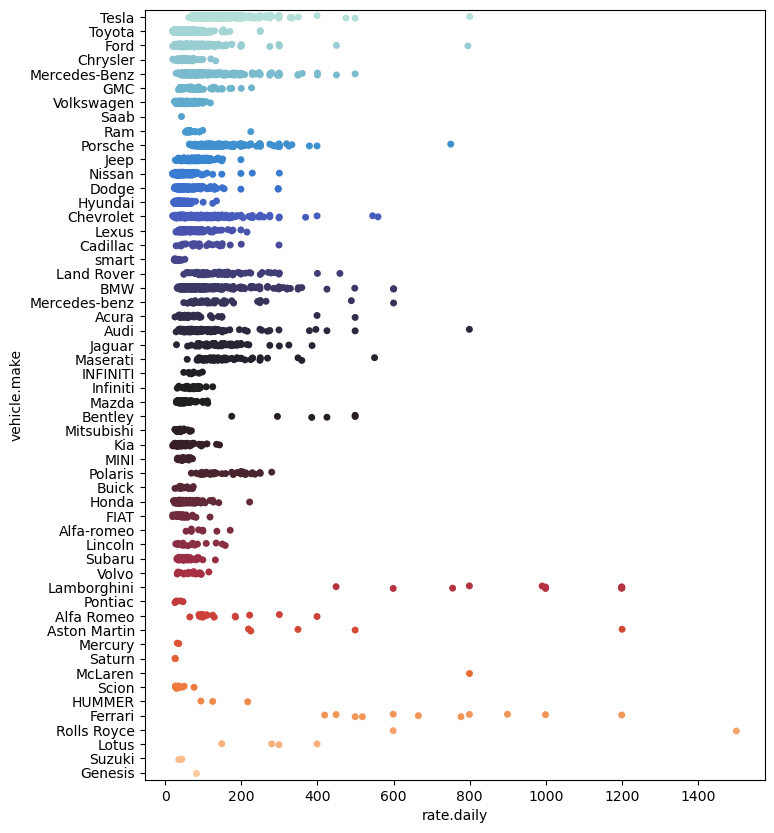

In [22]:
plt.figure(figsize=(8,10))
sns.stripplot(y=df['vehicle.make'], x=df['rate.daily'], palette='icefire')
plt.show()

The scatter plot categorizes various vehicle makes and displays the distribution of their rental rates or possibly another numerical metric. More common makes, such as Ford, Toyota, and Chevrolet, have a broad spread of rates, reflecting a wide variety of models or rental prices. Luxury and specialty makes like Lamborghini, Ferrari, and Rolls Royce show fewer data points, with values concentrated at the higher end of the scale, indicating a trend toward higher rates for these vehicles. The color gradient may be used to denote different ranges or categories within the metric being analyzed, such as price segments or rental frequency categories.

## What is the most rented car model?

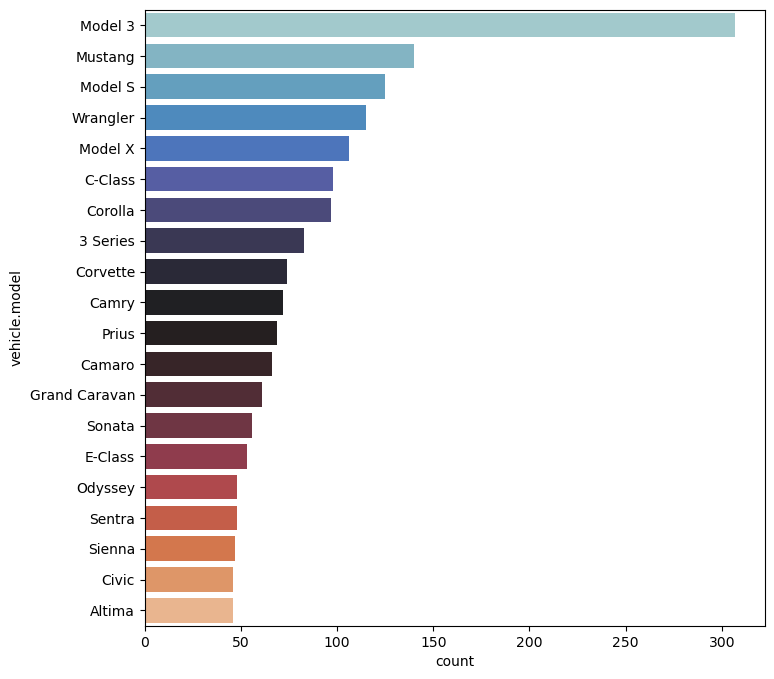

In [23]:
plt.figure(figsize=(8,8))
sns.countplot(y=df['vehicle.model'], order=df['vehicle.model'].value_counts().index[0:20], palette='icefire')
plt.show()

The horizontal bar chart ranks various vehicle models by count, representing how many of each model are available. The Model 3 appears to have the highest count, suggesting it's the most common vehicle model in the dataset, followed by models like the Mustang and Model S. The counts decrease as you move down the chart, with models like Altima, Civic, and Sienna having fewer counts. Each model is represented by a different color, possibly for visual distinction. The chart indicates the diversity and popularity of different car models in the rental service.

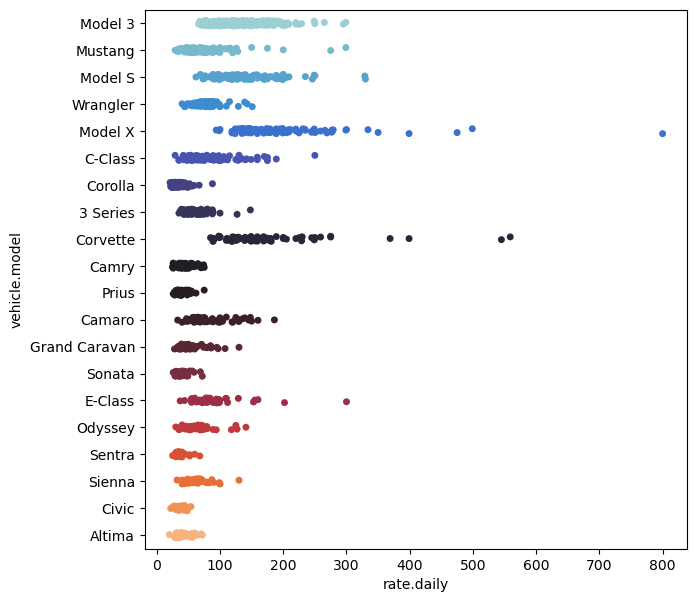

In [24]:
plt.figure(figsize=(7,7))
sns.stripplot(y=df['vehicle.model'], x=df['rate.daily'],order=df['vehicle.model'].value_counts().index[0:20], palette='icefire')
plt.show()

This scatter plot shows a variety of vehicle models along the y-axis and their corresponding daily rental rates on the x-axis. The spread of points across the horizontal axis for each model indicates the range of rates that each vehicle model is rented out at. For instance, the Tesla Model 3 has a wide range of rates, which could reflect different trim levels, rental durations, or owner-set prices. Some models like the Civic and Altima have a tighter cluster of rates, possibly indicating less variation in pricing for those models. The diversity in rates across different models suggests a dynamic pricing strategy in the rental market.

## What is the most rented vehicle type?

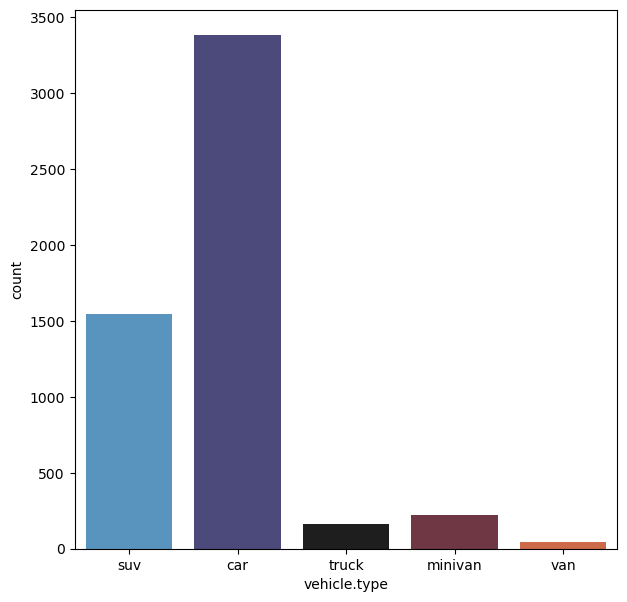

In [25]:
plt.figure(figsize=(7,7))
sns.countplot(x=df['vehicle.type'], palette='icefire')
plt.show()

The bar chart shows the count of different types of vehicles. Cars are the most common, followed by SUVs, with trucks, minivans, and vans being considerably less frequent. This suggests that cars are the preferred choice in this particular vehicle fleet.

## What is the most commonly used fuel type?

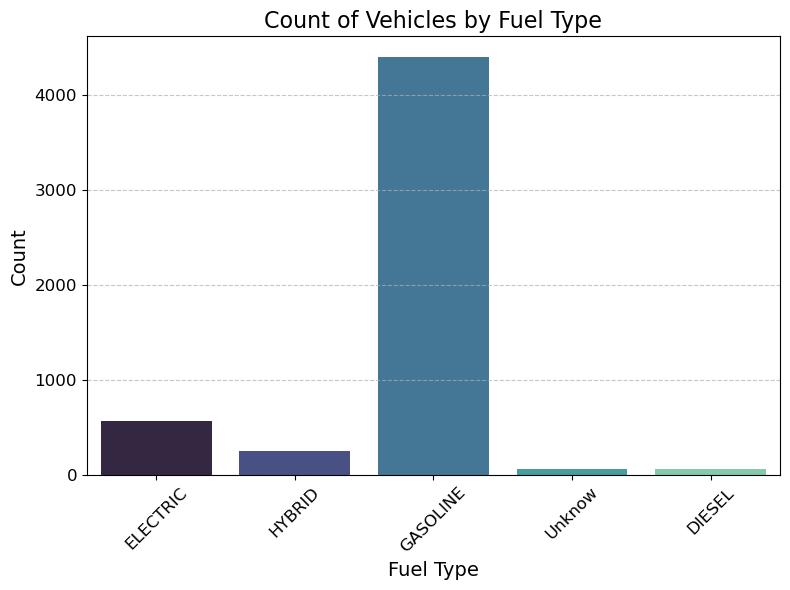

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))  # Set the figure size

# Create the count plot with seaborn
sns.countplot(x=df['fuelType'], palette='mako')  # Use a different color palette for better visibility

plt.title('Count of Vehicles by Fuel Type', fontsize=16)  # Add title
plt.xlabel('Fuel Type', fontsize=14)  # Add x-axis label
plt.ylabel('Count', fontsize=14)  # Add y-axis label
plt.xticks(fontsize=12, rotation=45)  # Rotate x-axis labels and adjust font size
plt.yticks(fontsize=12)  # Adjust y-axis tick font size
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal gridlines

# Show plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


The bar chart illustrates the count of vehicles categorized by fuel type. Gasoline-powered vehicles dominate the count significantly, indicating they are the most common in this dataset. Electric and hybrid vehicles have a much smaller presence, with diesel being the least common. There's also a small number of vehicles whose fuel type is unknown. This distribution shows a strong preference or availability for gasoline vehicles within the fleet.

## What is the city with the highest car rental frequency?








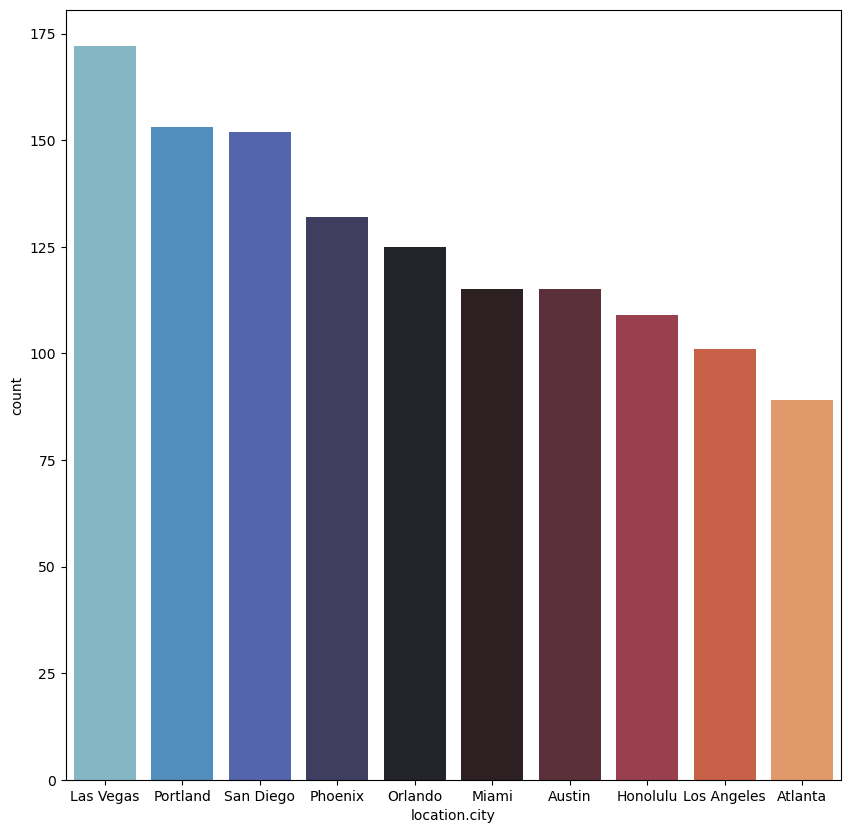

In [27]:
plt.figure(figsize=(10,10))
sns.countplot(x=df['location.city'], order=df['location.city'].value_counts().index[0:10], palette='icefire')
plt.show()

The bar chart presents the count of vehicles available in various cities. Las Vegas, Portland, and San Diego have the highest numbers, suggesting these locations have the most abundant availability of rental vehicles within the dataset. The count decreases for cities like Phoenix, Orlando, and Miami, with Honolulu, Los Angeles, and Atlanta having even fewer vehicles available. 

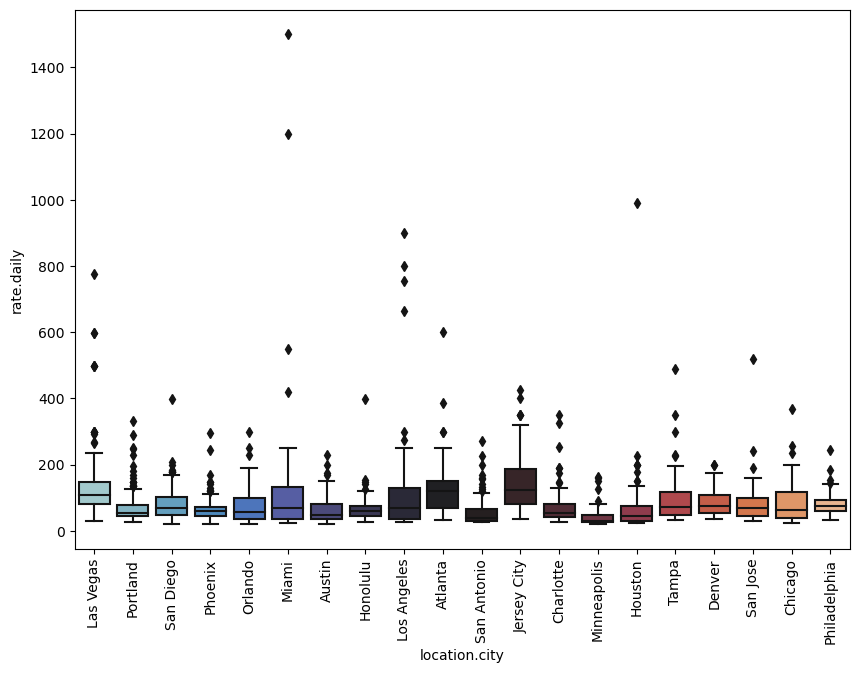

In [28]:
plt.figure(figsize=(10,7))
sns.boxplot(x=df['location.city'], y=df['rate.daily'],order=df['location.city'].value_counts().index[0:20], palette='icefire')
plt.xticks(rotation=90)
plt.show()


The boxplot graph shows the distribution of daily rental rates for vehicles across various cities. Most cities have a median rate well below $200, with outliers indicating some rentals are priced much higher, possibly due to luxury vehicles or premium services. 

The cities with the highest spread of rates, suggesting greater diversity in rental pricing, include Las Vegas and Portland. There are significant outliers in several cities, such as Las Vegas and Phoenix, where some vehicles have daily rates exceeding $1000.

The plot indicates varying rental strategies and vehicle options by location.

## What is the state with the highest car rental frequency?

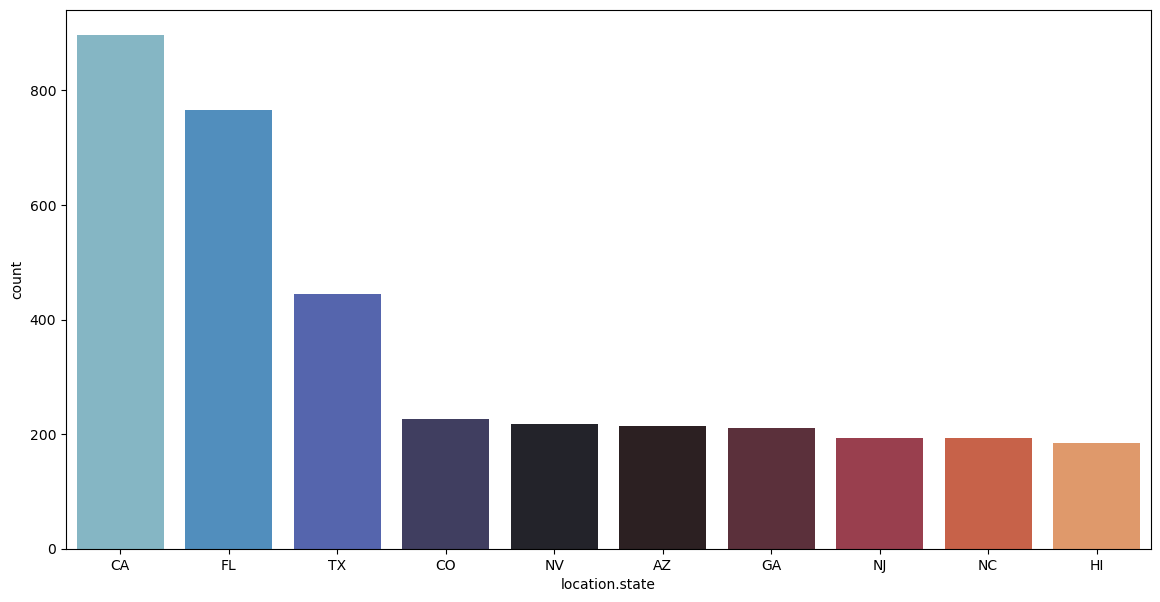

In [29]:
plt.figure(figsize=(14,7))
sns.countplot(x=df['location.state'], order=df['location.state'].value_counts().index[0:10], palette='icefire')
plt.show()
              

The bar chart displays the count of vehicles in different states, with California (CA) having the highest count, followed by Florida (FL) and Texas (TX).

There's a notable decrease in vehicle counts for Colorado (CO) and further reductions for Nevada (NV), Arizona (AZ), Georgia (GA), New Jersey (NJ), North Carolina (NC), and Hawaii (HI).

The visual indicates a higher concentration of available rental vehicles in certain states, possibly reflecting higher demand or larger markets in those areas.

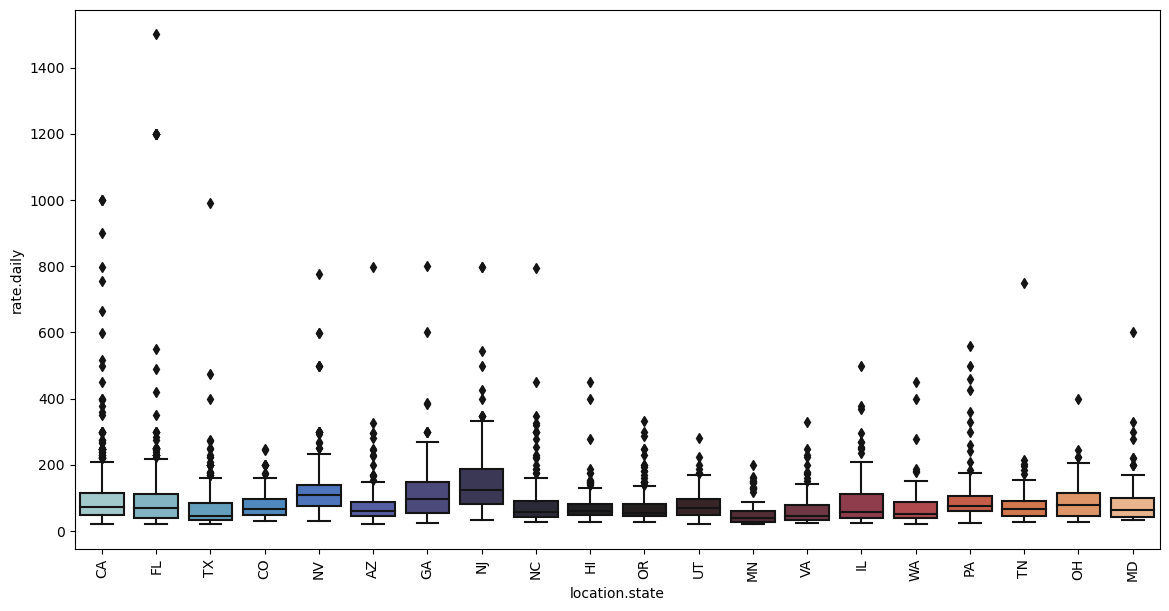

In [30]:
plt.figure(figsize=(14,7))
sns.boxplot(x=df['location.state'], y=df['rate.daily'],order=df['location.state'].value_counts().index[0:20], palette='icefire')
plt.xticks(rotation=90)
plt.show()

The boxplot shows the variation in daily rental rates across different states. Each box represents the interquartile range of rental rates for a state, with the line inside the box indicating the median rate. The 'whiskers' extend to the higher and lower values, while points beyond are outliers. Most states have a similar median rate, but some states like California (CA) show a higher spread of rates, indicating a diverse range of rental prices. There are outliers in many states, suggesting some exceptionally high rental rates, likely for premium vehicles or during peak demand. Overall, the plot reflects both the typical and the extreme rental rates in each state.

## "Fuel Type by Daily Rate"

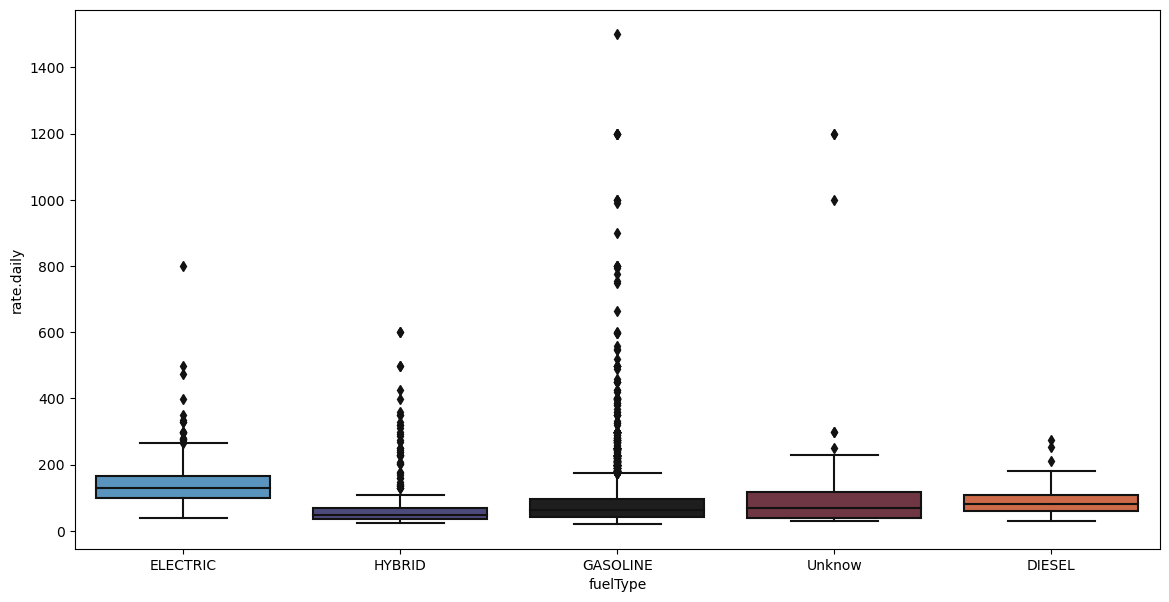

In [31]:
plt.figure(figsize=(14,7))
sns.boxplot(x=df['fuelType'], y=df['rate.daily'], palette='icefire')
plt.show()

The boxplot displays the distribution of daily rental rates by vehicle fuel type. Electric vehicles tend to have a higher median rental rate compared to hybrid and gasoline vehicles. The range of rates for gasoline vehicles is quite wide, indicating a variety of options from budget to premium pricing. There's a significant number of outliers, especially for gasoline vehicles, which suggests some gasoline vehicles are rented at much higher rates, potentially due to luxury models or additional features. Diesel vehicles show the lowest median rate, which could reflect lower demand or more affordable options in this category. Vehicles with an unknown fuel type have a narrow interquartile range, indicating less variability in their rental rates.

## "How many trips were made?"









In [32]:
viagens = df[['fuelType','vehicle.make','vehicle.model',
              'vehicle.type','renterTripsTaken']].groupby(['fuelType','vehicle.make','vehicle.model',
                                                           'vehicle.type']).sum().reset_index()
viagens.sort_values('renterTripsTaken', ascending=False).head(30)

,fuelType,vehicle.make,vehicle.model,vehicle.type,renterTripsTaken
37,ELECTRIC,Tesla,Model 3,car,10010
204,GASOLINE,Ford,Mustang,car,5903
479,GASOLINE,Toyota,Corolla,car,5860
284,GASOLINE,Jeep,Wrangler,suv,4969
137,GASOLINE,Chevrolet,Corvette,car,4470
38,ELECTRIC,Tesla,Model S,car,4020
39,ELECTRIC,Tesla,Model X,suv,3723
84,GASOLINE,BMW,3 Series,car,3516
476,GASOLINE,Toyota,Camry,car,3337
568,HYBRID,Toyota,Prius,car,3054


# Results:

* Correlation Analysis: The dataset shows a strong positive correlation between variables like renterTripsTaken and reviewCount, indicating that cars with more trips tend to receive more reviews.

* Rental Rates Analysis: Daily rental rates vary widely across different vehicles, with some outliers having exceptionally high rates.

* Geographic Insights: Certain cities and states have higher demand for rental cars, suggesting potential areas for business expansion or targeted marketing efforts.

* Vehicle Composition: The dataset contains a diverse range of vehicle makes and models, with some brands and models being more popular among renters.

* Fuel Type Preferences: Gasoline-powered vehicles are the most common, followed by hybrids and electric vehicles, indicating a preference for traditional fuel types.


# Recommendations:

* Pricing Strategy: Consider adjusting rental rates based on factors such as vehicle popularity, demand in specific locations, and seasonal variations to optimize revenue.

* Inventory Management: Focus on increasing the availability of popular vehicle makes and models to meet customer demand, while also considering adding more environmentally friendly options like electric or hybrid vehicles.

* Geographic Expansion: Explore opportunities to expand operations in high-demand cities and states identified in the analysis to capture a larger market share.

* Customer Experience: Encourage renters to leave reviews by providing incentives or rewards, as positive reviews can lead to increased bookings and improve the overall reputation of the rental service.

* Data Collection: Continuously collect and analyze data on customer preferences, rental patterns, and market trends to make informed decisions and stay competitive in the car rental industry.

These recommendations aim to optimize business performance, enhance customer satisfaction, and drive growth in the car rental service.